In [115]:
import pandas as pd

In [116]:
base = pd.read_excel('/content/dados_asset_bills.xlsx', sheet_name = 'Planilha1')

# ANALISE DE DUPLICATAS POR ENDOSSER

## ANALISE DUPLICATAS FINALIZADAS

Baseado na hipótese de quanto mais histórico de duplicatas finalizadas um endossante tem, maior é a confiabilidade lhe empregada, o seguinte estudo apresenta uma proposta de faixa de score de pontuação:

In [117]:
finalizadas = base[base['state'] == 'finished']

In [118]:
finalizadas_por_fornecedor = finalizadas.groupby(by=["NOME_ENDOSSER"]).size()

In [119]:
finalizadas_por_fornecedor = finalizadas_por_fornecedor.sort_values(ascending=True)

In [120]:
finalizadas_por_fornecedor.describe()

,0
count,88.000000
mean,5.340909
std,9.083124
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,68.000000


<Axes: >

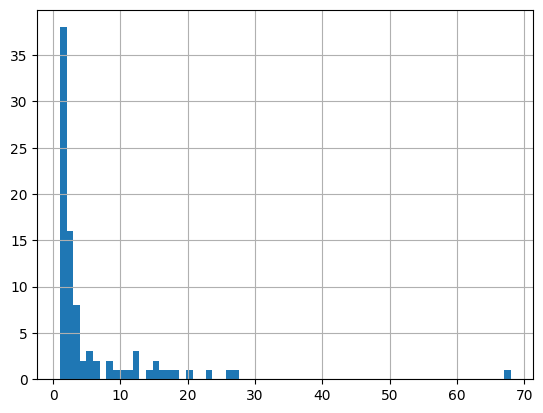

In [121]:
finalizadas_por_fornecedor.hist(bins=68)

- Quantidade de Fornecedores com duplicatas finalizadas: 88
- Média por Fornecedor: 5.340909
- Desvio Padrão: 9.083124
- 25%: 1.000000
- 50%: 2.000000
- 75%: 5.000000

A quantidade duplicatas finalizadas por fornecedor é importante pois permite com que possamos através dela mensurar quantos adiantamentos foram concluídos. Um histórico pequeno de duplicatas finalizadas pode determinar um nivel de confiabilidade baixo, que pode ser devido a uma falha de compromisso com os pagamentos ou por primeiras ocorrências de duplicatas de um fornecedor.
<br>
<br>
Com a análise é possível visualizar que:
- 75% dos fornecedores possuem de 1 à 5 duplicatas finalizadas.
- A quantidade de duplicatas finalizadas dos 25% restantes podem chegar a 1173% acima da média.
- A presença de outliers distorcem a visão dos 25% restantes, visto que a amplitude é de 62


Dado que a maioria dos fornecedores se encontram na faixa de 1 até 5 duplicatas finalizadas, consideremos o percentil de 75% para a primeira faixa de pontuação do *score*. <br>


Para os 25% restantes, os cálculos serão refeitos desconsiderando os valores pentencentes a primeira faixa de score.



In [122]:
finalizadas_por_fornecedor.loc[lambda x : x > finalizadas_por_fornecedor.quantile([0.75]).values[0]].sort_values(ascending=True).describe()

,0
count,21.000000
mean,16.809524
std,13.178084
min,6.000000
25%,10.000000
50%,14.000000
75%,18.000000
max,68.000000


Comparando esses resultado com a análise anterior, há uma desregularidade maior dos dados dentro do segundo conjunto.

In [123]:
segunda_faixa = finalizadas_por_fornecedor.loc[lambda x : x > finalizadas_por_fornecedor.quantile([0.75]).values[0]].sort_values(ascending=True)

<Axes: >

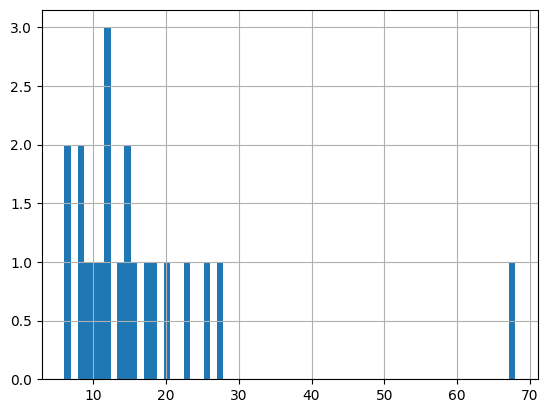

In [124]:
segunda_faixa.hist(bins=68)

O fator de desvio deve-se a um único fornecedor com quantidade de duplicatas elevada, elevando a média e assim trazendo uma visão desvio não proporcional a maior parte do conjunto conjunto. Também, a frequencia de fornecedores com quantidade de duplicatas finalizadas acima de 18 e abaixo de 30 é menor do que na faixa de fornecedores com quantidade de duplicatas de 6 à 18.


Considerando que 75% do conjunto está na faixa de 6 a 18 duplicatas finalizadas, os próximos cálculos desconsiderarão momentaneamente valores acima dessa faixa


In [125]:
segunda_faixa = segunda_faixa.loc[lambda x : x <= segunda_faixa.quantile([.75]).values[0]].sort_values(ascending=True)

In [126]:
segunda_faixa.describe()

,0
count,16.000000
mean,11.812500
std,3.798574
min,6.000000
25%,8.750000
50%,12.000000
75%,15.000000
max,18.000000


<Axes: >

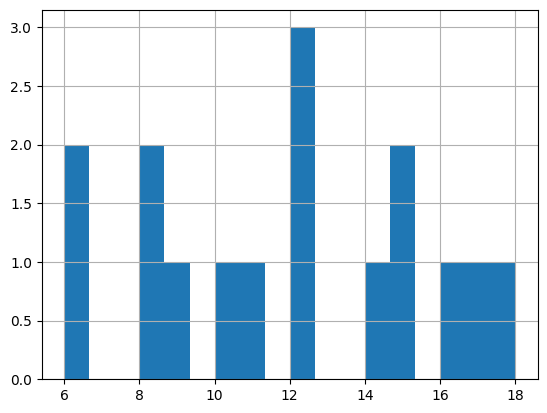

In [127]:
segunda_faixa.hist(bins=18)

A variação dentro dessa faixa de valores é bem menor do que no conjunto anterior. Em uma hipótese, se considerassemos apenas o percentil de 75% desse conjunto e juntássemos os 25% restantes com a faixa de acima de 18 e menor que 30 em outro conjunto, os dados do outro conjunto criado teriam um desvio maior do que o desse segundo conjunto total que está sendo avaliado.

Descrição da hipótese:<br>
- c1 = 6-18 -> desvio padrão igual à 3,79
- c2 = 19-30 -> desvio padrão igual à 3,16
- ch1 = 6-15 -> desvio padrão igual à 3,09
- ch2 = 16-30 -> desvio padrão igual à 4,39

*Diferença entre conjuntos:*
  - c1 - c2 = 0,63
  - ch1 - ch2 = 1,3
<br>

*Legenda:*
- c1: Conjunto 1
- c2: Conjunto 2
- ch1: Conjunto hipótese 1
- ch2: Conjunto hipótese 2

<br>
Dado esse fatores, consideraremos:
<br>

- Primeira faixa do score: 1-5 duplicatas finalizadas.
- Segunda faixa do score: 6-18 duplicatas finalizadas.
- Terceira faixa do score: 19-30 duplicatas finalizadas.
- Quarta faixa do score: acima de 30 duplicatas finalizadas.


## ANÁLISE DO TOTAL DE DUPLICATAS

Baseado na hipótese de quanto mais histórico de duplicatas finalizadas de um endossante pelo seu total de duplicatas, maior é a confiabilidade lhe empregada, o seguinte estudo apresenta uma proposta de faixa de score de pontuação:

In [128]:
base_total = base[['NOME_ENDOSSER','state']]

In [129]:
base_total = base_total.groupby(['NOME_ENDOSSER', 'state']).size().reset_index(name='total')

In [130]:
base_total = base_total.pivot(values = 'total', index = 'NOME_ENDOSSER', columns = 'state')

In [131]:
base_total['finished'] = base_total['finished'].fillna(0)

In [132]:
base_total['active'] = base_total['active'].fillna(0)

In [133]:
base_total['canceled'] = base_total['canceled'].fillna(0)

In [134]:
base_total

state,active,canceled,finished
NOME_ENDOSSER,,,
2001-08-01 00:00:00,1.0,0.0,0.0
LEAO NORDESTE INDUSTRIA E COMERCIO DE PLASTICOS LTDA,50.0,0.0,0.0
RAIADROGASIL S/A,7.0,2.0,2.0
Shopping São Paulo,1.0,0.0,0.0
027 SMP - IND. COMERCIO MOVEIS LTDA,12.0,0.0,0.0
...,...,...,...
testeFa,0.0,0.0,1.0
testeFabricio,2.0,0.0,0.0
testeFalha500,30.0,0.0,0.0


In [135]:
base_total['perc'] = (base_total['finished']/(base_total['finished']+base_total['canceled']))*100

<Axes: >

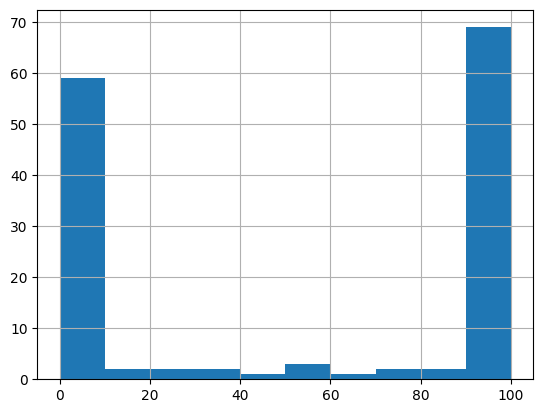

In [136]:
base_total['perc'].hist()

In [137]:
base_total = base_total.sort_values(by=['perc'])

In [138]:
base_total.describe()

state,active,canceled,finished,perc
count,609.000000,609.000000,609.000000,143.000000
mean,225.420361,71.408867,0.771757,53.465794
std,4422.659613,1716.876230,3.916328,47.860954
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,0.000000,78.947368
75%,36.000000,0.000000,0.000000,100.000000
max,109148.000000,42370.000000,68.000000,100.000000


In [139]:
(len(base_total[base_total['finished'] == 0])/ len(base_total)) * 100

85.55008210180624

In [140]:
base_total['perc'] = base_total['perc'].fillna(0)

In [141]:
base_total.sort_values(by=['finished', 'perc'],ascending=[False,True])

state,active,canceled,finished,perc
NOME_ENDOSSER,,,,
HERA METAIS IND COM PERF DE ALUM LTDA,471.0,0.0,68.0,100.000000
STL ALUMINIO INDUSTRIA E COMERCIO LTDA,115.0,0.0,27.0,100.000000
MAIS DISTRIBUIDORA LTDA,1259.0,0.0,26.0,100.000000
BC INDUSTRIA COMERCIO E REPRESENTACOES DE MALHAS LTDA,4.0,3.0,23.0,88.461538
TURBO AUTO PECAS E ACESSORIOS LTDA,54.0,0.0,20.0,100.000000
...,...,...,...,...
testeCedenteFabricio,2.0,0.0,0.0,0.000000
testeFabricio,2.0,0.0,0.0,0.000000
testeFalha500,30.0,0.0,0.0,0.000000


In [142]:
base_total['perc'].describe()

,perc
count,609.000000
mean,12.554365
std,32.395278
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,100.000000


In [143]:
base_total['perc'].loc[lambda x : x >= base_total['perc'].quantile([.75]).values[0]].sort_values(ascending=True)

,perc
NOME_ENDOSSER,
Naguirre Filial Extrema,0.0
LIRA & KAMAROWSKI COMERCIO ATACADISTA E IMPORTADOR,0.0
LIRA ALIMENTOS IND E COMERCIO EIRELI,0.0
LIRA ALIMENTOS INDUSTRIA E COMERCIO EIRELI,0.0
LITORAL TINTURARIA LTDA,0.0
...,...
DARUNE IMPORTADORA E EXPORTADORA LTDA,100.0
Cedente 898,100.0
Cedente 200,100.0


In [144]:
base_total.groupby(['perc']).size().reset_index(name='counts')

,perc,counts
0,0.000000,521
1,0.007080,1
2,1.587302,1
3,6.250000,1
4,8.333333,1
5,12.500000,2
6,25.000000,2
7,36.363636,1
8,38.095238,1
9,42.857143,1


Com a análise é factível que mais de 75% dos fornecedores não possuem 0% de duplicatas encerradas. Dado essa informação, esses fornecedores não receberão pontuação de conclusão e a análise será continuada sem considerar os fornecedores com 0%.

In [145]:
base_total = base_total[base_total['perc'] != 0]

<Axes: >

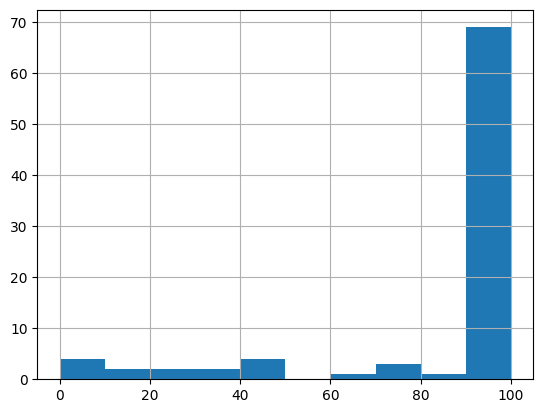

In [146]:
base_total['perc'].hist()

In [147]:
base_total['perc'].describe()

,perc
count,88.000000
mean,86.881915
std,28.322586
min,0.007080
25%,100.000000
50%,100.000000
75%,100.000000
max,100.000000


Dado que a maioria do conjunto possui 100% de duplicatas finalizadas, será realizado uma breve análise sem esse percentual.

<Axes: >

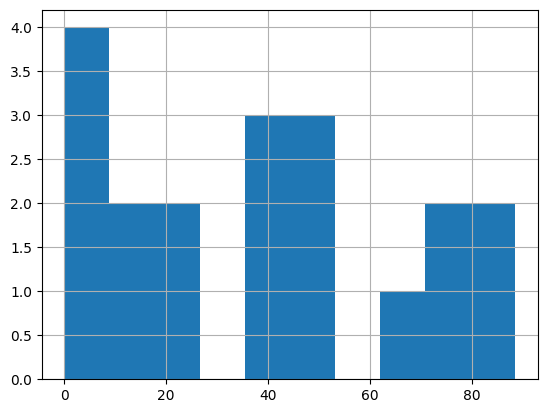

In [148]:
base_total[base_total['perc'] <100]['perc'].hist()

In [149]:
base_total[base_total['perc'] <100]['perc'].describe()

,perc
count,19.000000
mean,39.242554
std,28.668820
min,0.007080
25%,12.500000
50%,38.095238
75%,57.352941
max,88.461538


Com a análise realizada acima é notavél que:

25% dos fornecedores possuem até 12% de duplicatas encerradas, essa será a primeira faixa do score de percentual de duplicatas finalizadas.

25% dos fornecedores possuem mais de 60% e menos de 88% de duplicatas finalizadas. Essa será considerada a Terceira faixa do score

Fornecedores com mais de 88% de duplicatas finalizadas serão pertencentes a quinta faixa do score.

In [165]:
base_total[(base_total['perc'] > 12) & (base_total['perc'] < 60)]['perc'].sort_values(ascending=False).describe()

,perc
count,10.000000
mean,34.231602
std,14.737595
min,12.500000
25%,25.000000
50%,37.229437
75%,48.214286
max,50.000000


Baseano na mediana do conjunto de fornecedores com duplicatas finalizadas acima de 12% e menor que 60, a segunda e a terceira faixa do conjunto serão respectivamente: <br>
 - Segunda faixa: >12% e <= 37%
 - Terceira faixa: > 37% e < 60%

---



Dessa forma, as faixas de score de percentual de duplicatas finalizadas serão: <br>
- Faixa 1: <= 12%
- Faixa 2: > 12% e <= 37%
- Faixa 3: > 37% e <= 60%
- Faixa 4: > 60 e <= 88%
- Faixa 5: > 88%